##### Brent Oil Price Change Point Analysis - Data Workflow

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import custom modules
sys.path.append('..')
from src.change_point_model import ChangePointModel, calculate_price_impact

##### 1. Data Loading & Exploration

In [2]:
# Load Brent oil price data
data = pd.read_csv('../data/BrentOilPrices.csv')
data['Date'] = pd.to_datetime(data['Date'])

print(f"Data shape: {data.shape}")
print(f"Date range: {data['Date'].min()} to {data['Date'].max()}")
print(f"Price range: ${data['Price'].min():.2f} to ${data['Price'].max():.2f}")

data.head()

Data shape: (9011, 2)
Date range: 1987-05-20 00:00:00 to 2022-11-14 00:00:00
Price range: $9.10 to $143.95


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


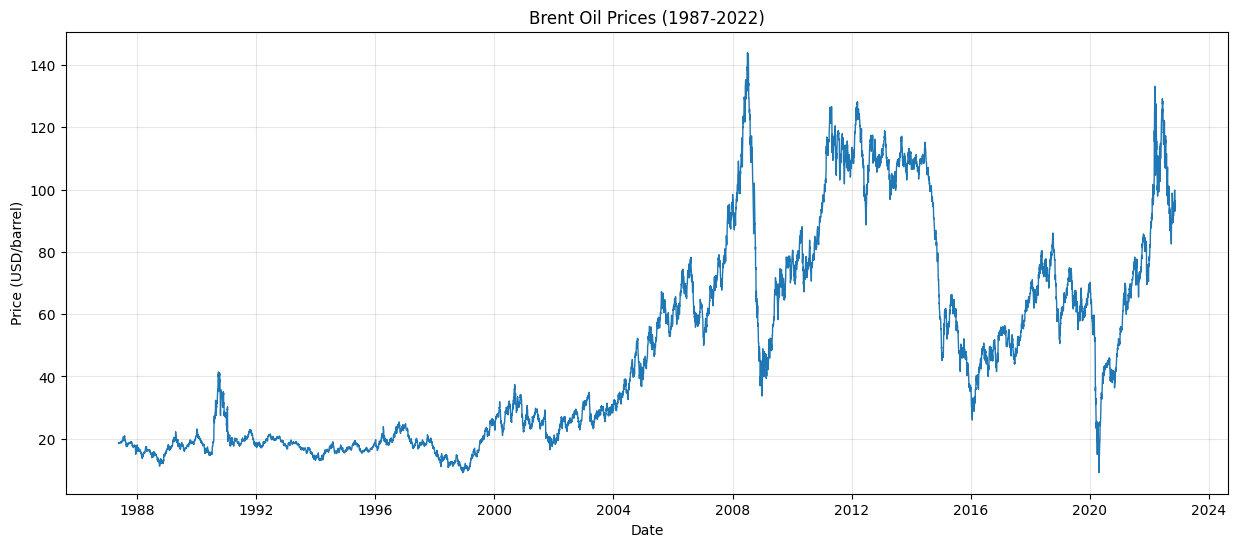

In [3]:
# Plot price series
plt.figure(figsize=(15, 6))
plt.plot(data['Date'], data['Price'], linewidth=1)
plt.title('Brent Oil Prices (1987-2022)')
plt.xlabel('Date')
plt.ylabel('Price (USD/barrel)')
plt.grid(True, alpha=0.3)
plt.show()

##### 2. Change Point Detection

In [4]:
# PELT method
pelt_model = ChangePointModel(data, method='pelt')
pelt_results = pelt_model.detect_change_points(penalty=0.1)

print(f"PELT detected {len(pelt_results['change_points'])} change points")
print("Change point dates:")
for i, date in enumerate(pelt_results['change_dates'][:5]):
    print(f"  {i+1}. {date}")

PELT detected 5 change points
Change point dates:
  1. 1987-06-03 00:00:00
  2. 1987-06-19 00:00:00
  3. 1987-07-06 00:00:00
  4. 1987-07-21 00:00:00
  5. 1987-08-05 00:00:00


In [5]:
# Binary segmentation
binseg_model = ChangePointModel(data, method='binseg')
binseg_results = binseg_model.detect_change_points(penalty=0.05)

print(f"Binary Segmentation detected {len(binseg_results['change_points'])} change points")

Binary Segmentation detected 7 change points


##### 3. Visualization with Change Points

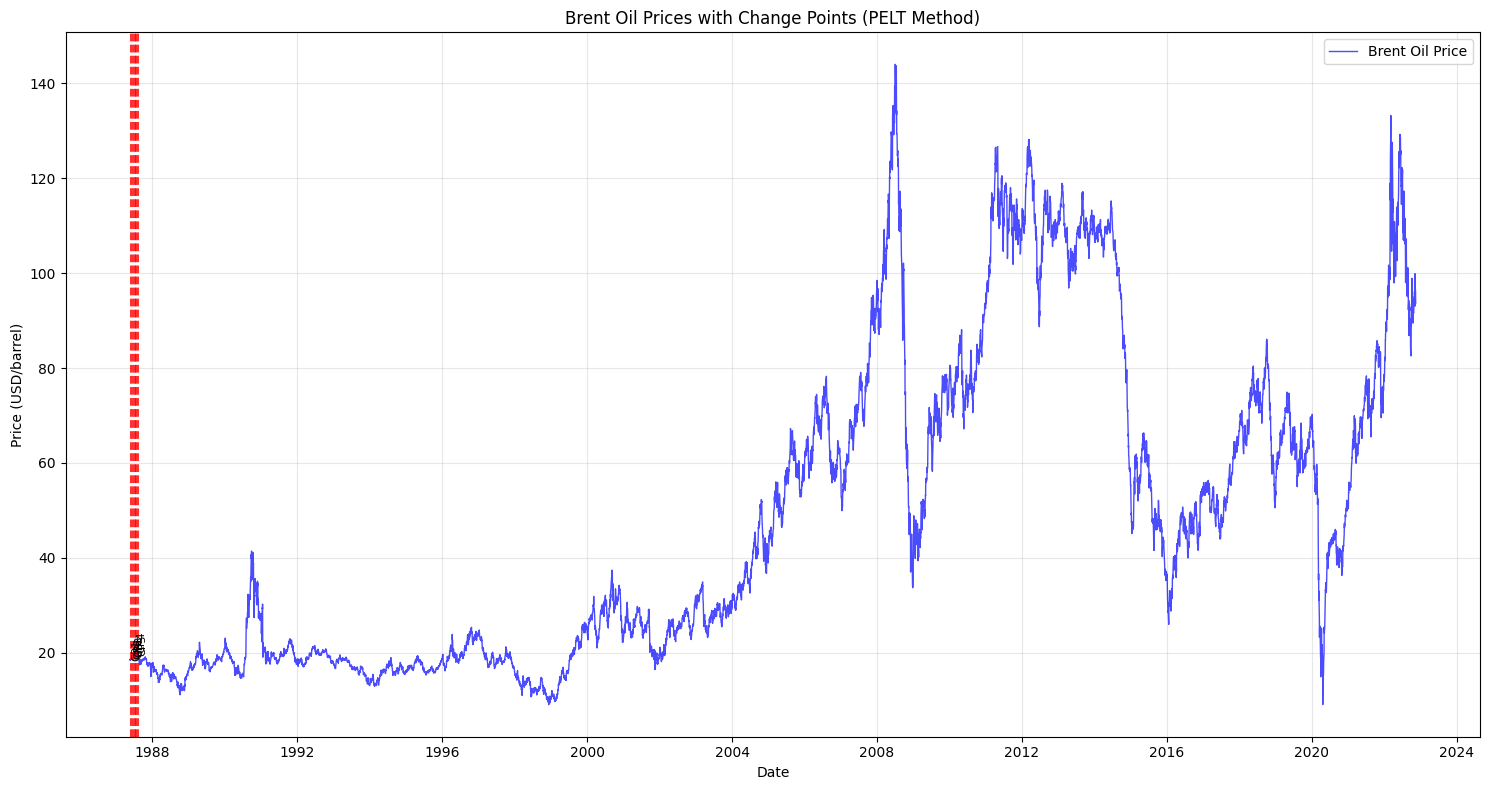

In [6]:
plt.figure(figsize=(15, 8))
plt.plot(data['Date'], data['Price'], 'b-', alpha=0.7, linewidth=1, label='Brent Oil Price')

# Mark change points
for i, cp in enumerate(pelt_results['change_points'][:10]):
    plt.axvline(x=data.iloc[cp]['Date'], color='red', linestyle='--', alpha=0.8)
    if i < 5:
        plt.text(data.iloc[cp]['Date'], data.iloc[cp]['Price'], 
                f'CP{i+1}', rotation=90, fontsize=8)

plt.title('Brent Oil Prices with Change Points (PELT Method)')
plt.xlabel('Date')
plt.ylabel('Price (USD/barrel)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

##### 4. Price Impact Analysis

In [7]:
# Calculate price impacts
if pelt_results['change_points']:
    impacts = calculate_price_impact(data, pelt_results['change_points'])
    
    print(f"Average percentage change: {impacts['avg_percentage_change']:.2f}%")
    
    # Show individual impacts
    print("\nIndividual change point impacts:")
    for i, impact in enumerate(impacts['impacts'][:5]):
        print(f"CP{i+1}: {impact['percentage_change']:.2f}% change")

Average percentage change: -0.26%

Individual change point impacts:
CP1: 5.62% change
CP2: -0.22% change
CP3: -6.17% change
